In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
all_cards = pd.read_csv('cleaned_datasets/allsets_cleaned.csv', index_col=0)

In [3]:
all_cards.head()

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
0,Aerial Modification,W,5.0,{4}{W},NaN,NaN,NaN,Enchant creature or Vehicle\nAs long as enchan...,uncommon,Enchant,NaN,Enchantment
1,Aeronaut Admiral,W,4.0,{3}{W},3.0,1.0,NaN,Flying\nVehicles you control have flying.,uncommon,Flying,NaN,Creature
2,Aether Inspector,W,4.0,{3}{W},2.0,3.0,NaN,Vigilance\nWhen Aether Inspector enters the ba...,common,Vigilance,NaN,Creature
3,Aethergeode Miner,W,2.0,{1}{W},3.0,1.0,NaN,"Whenever Aethergeode Miner attacks, you get {E...",rare,NaN,NaN,Creature
4,Airdrop Aeronauts,W,5.0,{3}{W}{W},4.0,3.0,NaN,Flying\nRevolt — When Airdrop Aeronauts enters...,uncommon,"Flying, Revolt",NaN,Creature


In [4]:
all_cards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 0 to 7124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7125 non-null   object 
 1   colors      6169 non-null   object 
 2   manaValue   7125 non-null   float64
 3   manaCost    6617 non-null   object 
 4   power       3867 non-null   float64
 5   toughness   3877 non-null   float64
 6   loyalty     168 non-null    float64
 7   text        7025 non-null   object 
 8   rarity      7125 non-null   object 
 9   keywords    3399 non-null   object 
 10  supertypes  763 non-null    object 
 11  types       7125 non-null   object 
dtypes: float64(4), object(8)
memory usage: 723.6+ KB


In [5]:
creatures = all_cards.loc[all_cards.types.str.contains('Creature')].copy()
creatures.reset_index(drop=True, inplace=True)

In [6]:
creatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        3845 non-null   object 
 1   colors      3565 non-null   object 
 2   manaValue   3845 non-null   float64
 3   manaCost    3698 non-null   object 
 4   power       3814 non-null   float64
 5   toughness   3824 non-null   float64
 6   loyalty     0 non-null      float64
 7   text        3745 non-null   object 
 8   rarity      3845 non-null   object 
 9   keywords    2261 non-null   object 
 10  supertypes  457 non-null    object 
 11  types       3845 non-null   object 
dtypes: float64(4), object(8)
memory usage: 360.6+ KB


In [7]:
creatures.head()

,name,colors,manaValue,manaCost,power,toughness,loyalty,text,rarity,keywords,supertypes,types
0,Aeronaut Admiral,W,4.0,{3}{W},3.0,1.0,NaN,Flying\nVehicles you control have flying.,uncommon,Flying,NaN,Creature
1,Aether Inspector,W,4.0,{3}{W},2.0,3.0,NaN,Vigilance\nWhen Aether Inspector enters the ba...,common,Vigilance,NaN,Creature
2,Aethergeode Miner,W,2.0,{1}{W},3.0,1.0,NaN,"Whenever Aethergeode Miner attacks, you get {E...",rare,NaN,NaN,Creature
3,Airdrop Aeronauts,W,5.0,{3}{W}{W},4.0,3.0,NaN,Flying\nRevolt — When Airdrop Aeronauts enters...,uncommon,"Flying, Revolt",NaN,Creature
4,Audacious Infiltrator,W,2.0,{1}{W},3.0,1.0,NaN,Audacious Infiltrator can't be blocked by arti...,common,NaN,NaN,Creature


Here, I use a seaborn heatmap to visually indicate which columns have a large amount of NaN values.  We expect that the column loyalty should be entirely NaN, so we're going to drop that right away.  I plan to also drop the columns manaCost and text, but we'll first investigate why those columns have missing values, to confirm that our data is accurate.

<AxesSubplot:>

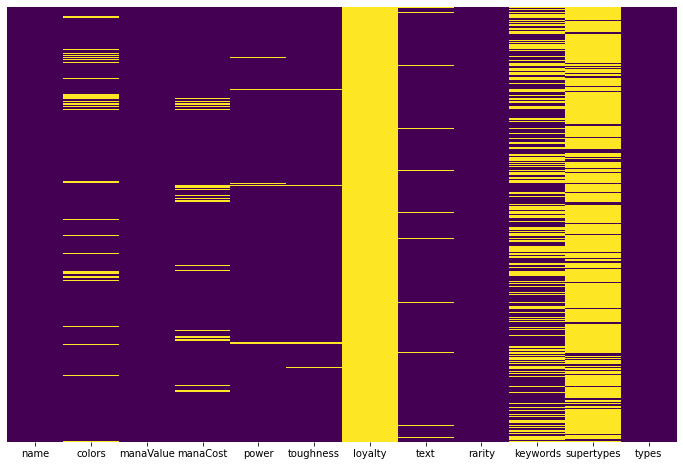

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(creatures.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
creatures.drop(['loyalty'], axis=1, inplace=True)

In [10]:
creatures.head()

,name,colors,manaValue,manaCost,power,toughness,text,rarity,keywords,supertypes,types
0,Aeronaut Admiral,W,4.0,{3}{W},3.0,1.0,Flying\nVehicles you control have flying.,uncommon,Flying,NaN,Creature
1,Aether Inspector,W,4.0,{3}{W},2.0,3.0,Vigilance\nWhen Aether Inspector enters the ba...,common,Vigilance,NaN,Creature
2,Aethergeode Miner,W,2.0,{1}{W},3.0,1.0,"Whenever Aethergeode Miner attacks, you get {E...",rare,NaN,NaN,Creature
3,Airdrop Aeronauts,W,5.0,{3}{W}{W},4.0,3.0,Flying\nRevolt — When Airdrop Aeronauts enters...,uncommon,"Flying, Revolt",NaN,Creature
4,Audacious Infiltrator,W,2.0,{1}{W},3.0,1.0,Audacious Infiltrator can't be blocked by arti...,common,NaN,NaN,Creature


In [11]:
len(creatures[creatures.text.isna()])

100

We have 100 creatures without any text listed.  These are almost definitely cards that only have flavor text on them, and no game abilities outside of their power and toughness.  I'll grab a sample of ten of them, and quickly search the cards on https://gatherer.wizards.com/Pages/Default.aspx, which is Wizards' public database of cards.  If those ten all prove to be as expected, we'll go ahead and drop the text column entirely, as it appears we haven't introduced any significant errors in our cleaning.

In [12]:
creatures[creatures.text.isna()].sample(10)

,name,colors,manaValue,manaCost,power,toughness,text,rarity,keywords,supertypes,types
3700,Cliffhaven Sell-Sword,W,2.0,{1}{W},3.0,1.0,NaN,common,NaN,NaN,Creature
49,Lathnu Sailback,R,5.0,{4}{R},5.0,4.0,NaN,common,NaN,NaN,Creature
2424,Canopy Gorger,G,6.0,{4}{G}{G},6.0,5.0,NaN,common,NaN,NaN,Creature
469,Broodhunter Wurm,G,4.0,{3}{G},4.0,3.0,NaN,common,NaN,NaN,Creature
2624,Axebane Beast,G,4.0,{3}{G},3.0,4.0,NaN,common,NaN,NaN,Creature
1817,Walking Corpse,B,2.0,{1}{B},2.0,2.0,NaN,common,NaN,NaN,Creature
2613,Feral Maaka,R,2.0,{1}{R},2.0,2.0,NaN,common,NaN,NaN,Creature
1184,Savai Sabertooth,W,2.0,{1}{W},3.0,1.0,NaN,common,NaN,NaN,Creature
921,Field Creeper,NaN,2.0,{2},2.0,1.0,NaN,common,NaN,NaN,"Artifact, Creature"
1398,Grizzled Outrider,G,5.0,{4}{G},5.0,5.0,NaN,common,NaN,NaN,Creature


In [13]:
#creatures.drop('text', axis=1, inplace=True)

In [14]:
len(creatures[creatures.manaCost.isna()])

147

There are 147 rows with NaN values for manaCost.  We have zero rows that have NaN values in manaValue, though, so these are almost definitely the backs of modal cards that transform through one game mechanic or another.  The amount of resources spent to cast the card is accurately reflected in the manaValue column, though the conditions for flipping the card are not going to be considered at this stage of our investigation.  Still, we'll do the same as we did above and check that this is true of about 10% of the data before dropping the column to make sure we didn't inadvertently introduce any errors.

In [15]:
creatures[creatures.manaCost.isna()].sample(15)

,name,colors,manaValue,manaCost,power,toughness,text,rarity,keywords,supertypes,types
2848,Wayward Disciple,B,3.0,NaN,2.0,4.0,Whenever Wayward Disciple or another creature ...,uncommon,NaN,NaN,Creature
3347,Malicious Invader,B,4.0,NaN,3.0,3.0,Flying\nMalicious Invader gets +2/+0 as long a...,uncommon,Flying,NaN,Creature
3457,Forsaken Thresher,NaN,3.0,NaN,5.0,5.0,"At the beginning of your precombat main phase,...",uncommon,NaN,NaN,"Artifact, Creature"
2317,Seshiro's Living Legacy,G,5.0,NaN,5.0,5.0,"Vigilance, haste",common,"Haste, Vigilance",NaN,"Enchantment, Creature"
2922,Vildin-Pack Alpha,R,3.0,NaN,4.0,3.0,Whenever a Werewolf enters the battlefield und...,rare,Transform,NaN,Creature
2196,Imperial Moth,W,4.0,NaN,2.0,4.0,Flying,common,Flying,NaN,"Enchantment, Creature"
2915,Branded Howler,R,3.0,NaN,4.0,4.0,"At the beginning of each upkeep, if a player c...",common,Transform,NaN,Creature
2201,Fragment of Konda,W,3.0,NaN,1.0,3.0,"Defender\nWhen Fragment of Konda dies, draw a ...",uncommon,Defender,NaN,"Enchantment, Creature"
2876,Persistent Nightmare,U,4.0,NaN,1.0,1.0,Skulk (This creature can't be blocked by creat...,mythic,Skulk,NaN,Creature
1698,Dire-Strain Demolisher,G,5.0,NaN,8.0,7.0,Ward {3} (Whenever this creature becomes the t...,uncommon,"Nightbound, Ward",NaN,Creature


In [16]:
creatures['text'].fillna('', inplace=True)
creatures.loc[creatures.text.str.contains('Disturb')]

,name,colors,manaValue,manaCost,power,toughness,text,rarity,keywords,supertypes,types
1564,Beloved Beggar,W,2.0,{1}{W},0.0,4.0,Disturb {4}{W}{W} (You may cast this card from...,uncommon,"Disturb, Transform",NaN,Creature
1573,Chaplain of Alms,W,1.0,{W},1.0,1.0,First strike\nWard {1} (Whenever this creature...,uncommon,"Disturb, First strike, Transform, Ward",NaN,Creature
1584,Lunarch Veteran,W,1.0,{W},1.0,1.0,Whenever another creature enters the battlefie...,common,"Disturb, Transform",NaN,Creature
1586,Mourning Patrol,W,3.0,{2}{W},2.0,3.0,Vigilance\nDisturb {3}{W} (You may cast this c...,common,"Disturb, Transform, Vigilance",NaN,Creature
1595,Baithook Angler,U,2.0,{1}{U},2.0,1.0,Disturb {1}{U} (You may cast this card from yo...,common,"Disturb, Transform",NaN,Creature
1598,Covetous Castaway,U,2.0,{1}{U},1.0,3.0,"When Covetous Castaway dies, mill three cards....",uncommon,"Disturb, Mill, Transform",NaN,Creature
1605,Galedrifter,U,4.0,{3}{U},3.0,2.0,Flying\nDisturb {4}{U} (You may cast this card...,common,"Disturb, Flying, Transform",NaN,Creature
1609,Malevolent Hermit,U,2.0,{1}{U},2.0,1.0,"{U}, Sacrifice Malevolent Hermit: Counter targ...",rare,"Disturb, Transform",NaN,Creature
1613,Overwhelmed Archivist,U,3.0,{2}{U},3.0,2.0,When Overwhelmed Archivist enters the battlefi...,uncommon,"Disturb, Transform",NaN,Creature
1633,Covert Cutpurse,B,3.0,{2}{B},2.0,1.0,"When Covert Cutpurse enters the battlefield, d...",uncommon,"Disturb, Transform",NaN,Creature


In [18]:
def extract_mana_value (df, keyword):
    
    # store the relevant index numbers from the dataframe
    indexes = df.loc[df.text.str.contains(keyword)].index

    # loop over each element to be changed
    for count, text in enumerate(df.loc[df.text.str.contains(keyword)].text):

        # find occurence of keyword 'Disturb'
        c = text.find(keyword)

        # capture the text after the 'Disturb' keyword that lists the mana cost of Disturbing 
        # the card, leaving out leading and trailing curly braces.
        text_value = text[c+9:text.rfind('}', c+8, c+20)]

        # remove the rest of the curly braces
        text_value = text_value.replace('{', '')
        text_value = text_value.replace('}', '')

        # calculate value to use in dataframe 
        new_value = len(text_value) 
        if text_value[0].isdigit():
            new_value += int(text_value[0]) - 1

        # update the value in the dataframe
        df.iat[indexes[count], 2] = new_value

In [19]:
extract_mana_value(creatures, 'Disturb')

In [20]:
creatures.loc[creatures.text.str.contains('Disturb')]

,name,colors,manaValue,manaCost,power,toughness,text,rarity,keywords,supertypes,types
1564,Beloved Beggar,W,6.0,{1}{W},0.0,4.0,Disturb {4}{W}{W} (You may cast this card from...,uncommon,"Disturb, Transform",NaN,Creature
1573,Chaplain of Alms,W,4.0,{W},1.0,1.0,First strike\nWard {1} (Whenever this creature...,uncommon,"Disturb, First strike, Transform, Ward",NaN,Creature
1584,Lunarch Veteran,W,2.0,{W},1.0,1.0,Whenever another creature enters the battlefie...,common,"Disturb, Transform",NaN,Creature
1586,Mourning Patrol,W,4.0,{2}{W},2.0,3.0,Vigilance\nDisturb {3}{W} (You may cast this c...,common,"Disturb, Transform, Vigilance",NaN,Creature
1595,Baithook Angler,U,2.0,{1}{U},2.0,1.0,Disturb {1}{U} (You may cast this card from yo...,common,"Disturb, Transform",NaN,Creature
1598,Covetous Castaway,U,5.0,{1}{U},1.0,3.0,"When Covetous Castaway dies, mill three cards....",uncommon,"Disturb, Mill, Transform",NaN,Creature
1605,Galedrifter,U,5.0,{3}{U},3.0,2.0,Flying\nDisturb {4}{U} (You may cast this card...,common,"Disturb, Flying, Transform",NaN,Creature
1609,Malevolent Hermit,U,3.0,{1}{U},2.0,1.0,"{U}, Sacrifice Malevolent Hermit: Counter targ...",rare,"Disturb, Transform",NaN,Creature
1613,Overwhelmed Archivist,U,4.0,{2}{U},3.0,2.0,When Overwhelmed Archivist enters the battlefi...,uncommon,"Disturb, Transform",NaN,Creature
1633,Covert Cutpurse,B,5.0,{2}{B},2.0,1.0,"When Covert Cutpurse enters the battlefield, d...",uncommon,"Disturb, Transform",NaN,Creature
